## Preprocessing

In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive, files
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 

# uploaded = files.upload()

drive.mount('/content/drive')

!ls "/content/drive/My Drive/ML_Colab/21-Deep-Learning/Homework/Instructions"

application_df = pd.read_csv('/content/drive/My Drive/ML_Colab/21-Deep-Learning/Homework/Instructions/charity_data.csv')

application_df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
AlphabetSoupCharity.h5			charity_data.csv  README.md
AlphabetSoupCharity_Optimization.ipynb	model.h5	  Starter_Code.ipynb


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


# Preprocess the data for ML modeling

In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
data = application_df.drop(columns = ['EIN','NAME'])
data

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [ ]:
# Determine the number of unique values in each column.
data.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [ ]:
# Look at APPLICATION_TYPE value counts for binning
data['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

application_types_to_replace = ['T25', 'T14', 'T29', 'T15', 'T17', 'T2', 'T12']

# Replace in dataframe
for app in application_types_to_replace:
    data['APPLICATION_TYPE'] = data['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
data['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
Other       54
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Look at CLASSIFICATION value counts for binning
data['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [ ]:
# Looking at classification value counts where they are greater than 1
more_than_one = data['CLASSIFICATION'].value_counts().loc[lambda x : x>1]
more_than_one

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [ ]:
grouped = data['CLASSIFICATION'].value_counts().loc[lambda x : x < 50]
grouped

C1230    36
C1400    34
C7200    32
C2300    32
C1240    30
C8000    20
C7120    18
C1500    16
C1800    15
C6000    15
C1250    14
C8200    11
C1238    10
C1278    10
C1235     9
C1237     9
C7210     7
C2400     6
C1720     6
C4100     6
C1257     5
C1600     5
C1260     3
C2710     3
C0        3
C3200     2
C1234     2
C1246     2
C1267     2
C1256     2
C2190     1
C4200     1
C2600     1
C5200     1
C1370     1
C1248     1
C6100     1
C1820     1
C1900     1
C1236     1
C3700     1
C2570     1
C1580     1
C1245     1
C2500     1
C1570     1
C1283     1
C2380     1
C1732     1
C1728     1
C2170     1
C4120     1
C8210     1
C2561     1
C4500     1
C2150     1
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = grouped.index.to_list()
# Replace in dataframe
for cls in classifications_to_replace:
    data['CLASSIFICATION'] = data['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
data['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      391
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
Name: CLASSIFICATION, dtype: int64

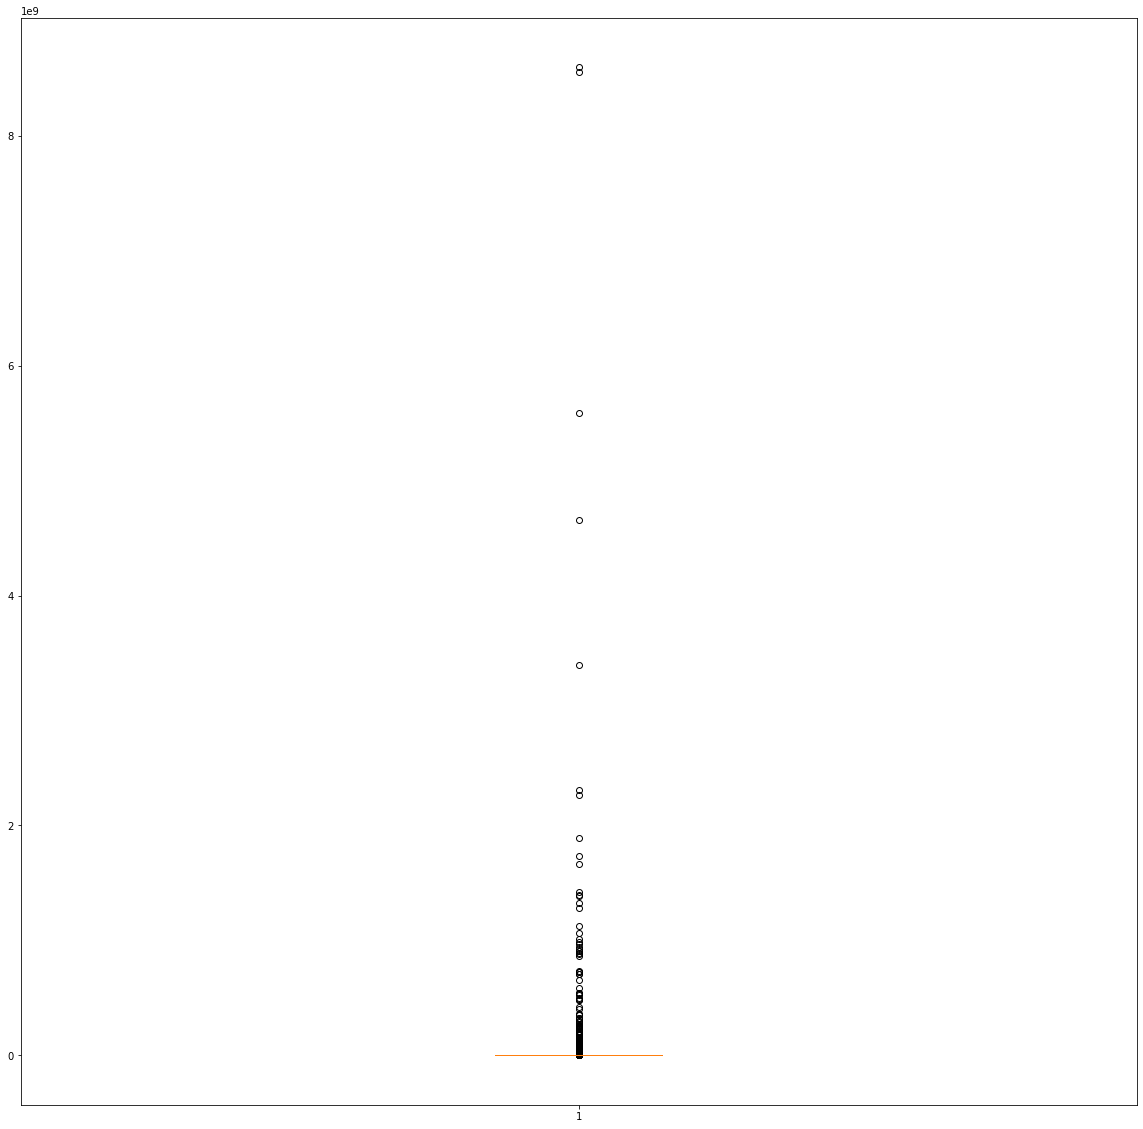

In [ ]:
# check for outliers for the ask amount column. There appear to be several
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20))
plt.boxplot(data['ASK_AMT'])
plt.show()

In [ ]:
# difficult to see from the boxplot what the threshold for outliers vs. non-outliers are. Let's calculate
# finding the 1st quartile
import numpy as np
q1 = np.quantile(data['ASK_AMT'], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(data['ASK_AMT'], 0.75)
med = np.median(data['ASK_AMT'])
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, lower_bound, upper_bound)
print(data["ASK_AMT"].value_counts().index.min(), data["ASK_AMT"].value_counts().index.max())


2742.0 887.0 11855.0
5000 8597806340


In [ ]:
# we can see from the above that there are outliers beyond the upper bound for ask amounts. Cutting out all the outliers (any ask amounts between around 8.5 billion and 12,000 may improve accuracy but will 
# cut out a significant amount of data, from around 34,0000 rows to 26,0000. This may undercut the purpose of building a model that has predictive power for new application data)
below_12 = data.loc[data['ASK_AMT'] < 12000]
below_12

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
5,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
...,...,...,...,...,...,...,...,...,...,...
34293,T3,CompanySponsored,C1000,Preservation,Association,1,0,N,5000,1
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0


In [ ]:
# we can possibly still meet the 75% accuracy benchmark if we reduce the outliers, but not all the way down to the ~12,000 threshold
below_15k = data.loc[data['ASK_AMT'] < 150000]
below_15k

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C1270,CLASSIFICATION_C1280,CLASSIFICATION_C1300,CLASSIFICATION_C1700,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C2700,CLASSIFICATION_C2800,CLASSIFICATION_C3000,CLASSIFICATION_C4000,CLASSIFICATION_C5000,CLASSIFICATION_C7000,CLASSIFICATION_C7100,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34293,1,5000,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
34294,1,5000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
new_data = pd.get_dummies(below_15k)

In [ ]:
# Split our preprocessed data into our features and target arrays
X = new_data.drop(columns = ['IS_SUCCESSFUL'])
y = new_data['IS_SUCCESSFUL']
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#Compile, Train, and Optimize the Model

In [ ]:
# check how many inputs we have
X.shape

(30474, 55)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = 'model_checkpoints/'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq=5,
    save_weights_only=True
    )

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5653 - accuracy: 0.7257 - 484ms/epoch - 2ms/step
Loss: 0.565339207649231, Accuracy: 0.7257142663002014


In [ ]:
# Export our model to HDF5 file
nn_model.save("/content/drive/My Drive/ML_Colab/21-Deep-Learning/Homework/Instructions/AlphabetSoupCharity.h5") 

OPTIMIZING THE MODEL

In [ ]:
# try to optimize so that accuracy exceeds the .75 target. Per the previous cellblock, accuracy currently stands at 0.726

In [ ]:
# set up tuner to optimize model

def create_model(hp):
    nn_model_opt = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model_opt.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=50,
        step=2), activation=activation, input_dim=55))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 50)):
        nn_model_opt.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=50,
            step=2),
            activation=activation))
    
    nn_model_opt.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model_opt.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model_opt

In [ ]:
# Import the kerastuner library
!pip install -q -U keras-tuner
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    overwrite = True,
    hyperband_iterations=2)

In [ ]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=30,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 01m 23s]
val_accuracy: 0.7483921647071838

Best val_accuracy So Far: 0.7502297163009644
Total elapsed time: 00h 35m 11s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# Get top 3 model hyperparameters and print the values
top_hyper = tuner.get_best_hyperparameters(1)
for param in top_hyper:
    print(param.values)

{'activation': 'tanh', 'first_units': 5, 'num_layers': 7, 'units_0': 33, 'units_1': 43, 'units_2': 31, 'units_3': 23, 'units_4': 7, 'units_5': 43, 'units_6': 9, 'units_7': 27, 'units_8': 7, 'units_9': 41, 'units_10': 23, 'units_11': 33, 'units_12': 13, 'units_13': 49, 'units_14': 43, 'units_15': 45, 'units_16': 7, 'units_17': 21, 'units_18': 49, 'units_19': 41, 'units_20': 49, 'units_21': 13, 'units_22': 25, 'units_23': 3, 'units_24': 29, 'units_25': 49, 'units_26': 25, 'units_27': 15, 'units_28': 1, 'units_29': 15, 'units_30': 19, 'units_31': 7, 'units_32': 23, 'units_33': 43, 'units_34': 37, 'units_35': 21, 'units_36': 29, 'units_37': 31, 'units_38': 1, 'units_39': 23, 'units_40': 49, 'units_41': 5, 'units_42': 31, 'units_43': 25, 'units_44': 21, 'units_45': 33, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


In [ ]:
# Evaluate the top 3 models against the test dataset
top_model = tuner.get_best_models(1)
for model in top_model:
    model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

239/239 - 1s - loss: 0.5352 - accuracy: 0.7502 - 957ms/epoch - 4ms/step
Loss: 0.5352252125740051, Accuracy: 0.7502297163009644


In [ ]:
model = create_model(top_hyper[0])

In [ ]:
model.save("/content/drive/My Drive/ML_Colab/21-Deep-Learning/Homework/Instructions/AlphabetSoupCharity_Optimization.h5") 